# Imports

In [1]:
import numpy as np
import pandas as pd;
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn import tree
from sklearn.externals.six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.feature_selection import SelectKBest, chi2
import pickle
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

/Users/calvintirrell/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/Users/calvintirrell/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


# Load data

In [2]:
data = pd.read_csv("../data/credit_approval.csv")

# Inspect data

In [3]:
# data.head()

In [4]:
# data.shape

In [5]:
# data.info()

In [6]:
# data.describe()

# Data Cleaning and Processing

## Manage blank, null & nan values

In [7]:
# Replace (impute) missing values (in numerical columns) with mean value
data.fillna(data.mean(), inplace = True)

In [8]:
# data.info()

## Rename Columns

In [9]:
data.columns

Index(['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10', 'A11',
       'A12', 'A13', 'A14', 'A15', 'class'],
      dtype='object')

In [10]:
data.rename(columns = {'A1':'Gender','A2':'Age','A3':'Debt',
                         'A4':'Married','A5':'BankClient',
                         'A6':'SchoolLevel','A7':'Ethnicity',
                        'A8':'YearsWorked','A9':'PriorDefault',
                         'A10':'Employed','A11':'CreditScore',
                         'A12':'DriversID','A13':'Citizen',
                        'A14':'ZipCode','A15':'Income','class':'Approval'
                        }, inplace = True)

In [11]:
data.columns

Index(['Gender', 'Age', 'Debt', 'Married', 'BankClient', 'SchoolLevel',
       'Ethnicity', 'YearsWorked', 'PriorDefault', 'Employed', 'CreditScore',
       'DriversID', 'Citizen', 'ZipCode', 'Income', 'Approval'],
      dtype='object')

## Convert data to a useable format

In [12]:
data['Gender'].head()

0    b
1    a
2    a
3    b
4    b
Name: Gender, dtype: object

## For now just going to drop blank, null, nan values

In [13]:
data.dropna(inplace = True)

In [14]:
# data.info()

In [15]:
# 0 = Female, 1 = Male
data['Gender'] = data['Gender'].replace(['a','b'],[1,0]).apply(np.int64)
data['Gender'].head()

0    0
1    1
2    1
3    0
4    0
Name: Gender, dtype: int64

In [16]:
# data.head()

## Age should be whole numbers, not decimals

In [17]:
data['Age'] = data['Age'].apply(np.int64)
data['Age'].head()

0    30
1    58
2    24
3    27
4    20
Name: Age, dtype: int64

## Values of 'u', 'y', 'l' aren't helpful - change with LabelEncoder()

In [18]:
data['Married'].value_counts()

u    510
y    159
l      2
Name: Married, dtype: int64

## Change 'Approval' column values (+/- aren't useful)

In [19]:
data['Approval'].head()

0    +
1    +
2    +
3    +
4    +
Name: Approval, dtype: object

In [20]:
# 0 = Not Approved, 1 = Approved
data['Approval'] = data['Approval'].replace(['+','-'],[1,0]).apply(np.int64)
print(data['Approval'].head())
print(data['Approval'].tail())

0    1
1    1
2    1
3    1
4    1
Name: Approval, dtype: int64
685    0
686    0
687    0
688    0
689    0
Name: Approval, dtype: int64


# Look into each column's specific data

In [21]:
# 'Gender', 'Age', 'Debt', 'Married', 'BankCustomer', 'EducationLevel',
# 'Ethnicity', 'YearsEmployed', 'PriorDefault', 'Employed', 'CreditScore',
# 'DriversLicense', 'Citizen', 'ZipCode', 'Income', 'Approval'

# for col in data.columns:
#     print(data[col].value_counts())
#     print()

## Change (encode) non-numerical values to numerical values

In [22]:
# change this to one hot encoder ----------

le = LabelEncoder()

for col in data:
    if data[col].dtypes == 'object':
        data[col] = le.fit_transform(data[col])

In [23]:
data.tail(10)

,Gender,Age,Debt,Married,BankClient,SchoolLevel,Ethnicity,YearsWorked,PriorDefault,Employed,CreditScore,DriversID,Citizen,ZipCode,Income,Approval
680,0,19,0.290,1,0,8,7,0.290,0,0,0,0,0,280.0,364,0
681,0,27,1.000,2,2,3,3,3.000,0,0,0,0,0,176.0,537,0
682,0,17,3.290,1,0,6,7,0.335,0,0,0,1,0,140.0,2,0
683,0,36,0.750,2,2,3,7,0.585,0,0,0,0,0,240.0,3,0
684,0,40,3.290,1,0,9,7,3.500,0,0,0,1,2,400.0,0,0
685,0,21,10.085,2,2,4,3,1.250,0,0,0,0,0,260.0,0,0
686,1,22,0.750,1,0,1,7,2.000,0,1,2,1,0,200.0,394,0
687,1,25,13.500,2,2,5,2,2.000,0,1,1,1,0,200.0,1,0
688,0,17,0.205,1,0,0,7,0.040,0,0,0,0,0,280.0,750,0
689,0,35,3.375,1,0,1,3,8.290,0,0,0,1,0,0.0,0,0


In [24]:
data2 = data.copy()

## Feature correlations

In [25]:
# correlations = data.corr()
# f, ax = plt.subplots(figsize = (12, 9))

# mask = np.zeros_like(correlations, dtype = np.bool)
# mask[np.triu_indices_from(mask)] = True

# heatmap_one = sns.heatmap(correlations, cmap = 'Reds', mask = mask)
# print(heatmap_one)

# Save visual as png file
# fig = heatmap_one.get_figure()
# fig.savefig("output.png")

## Subset of data with significant correlation

In [26]:
# cols = ['Age', 'Debt', 'SchoolLevel', 'YearsWorked', 'PriorDefault',
#         'Employed', 'CreditScore', 'Income', 'Approval']

# sig_corr = data[cols].corr()
# f, ax = plt.subplots(figsize = (12, 9))

# mask = np.zeros_like(sig_corr, dtype = np.bool)
# mask[np.triu_indices_from(mask)] = True

# sns.heatmap(sig_corr, cmap = 'Reds', mask = mask)

## Subset of data with most significant correlation

In [27]:
# # These columns are my best guess at the most/best important
# # features for credit card application approval
# cols2 = ['Debt', 'YearsWorked', 'PriorDefault', 'Employed',
#         'CreditScore', 'Income', 'Approval']

# m_sig_corr = data[cols2].corr()
# f, ax = plt.subplots(figsize = (12, 9))

# mask = np.zeros_like(m_sig_corr, dtype = np.bool)
# mask[np.triu_indices_from(mask)] = True

# sns.heatmap(m_sig_corr, cmap ='Reds', mask = mask)

# Final subset of data pairplot

In [28]:
# sns.set()
# cols3 = ['Debt', 'YearsWorked', 'PriorDefault', 'Employed',
#         'CreditScore', 'Income']
# sns.pairplot(data[cols3])
# plt.show()

## Data subset distributions

In [29]:
# cols4 = ['Debt', 'YearsWorked', 'PriorDefault', 'Employed',
#         'CreditScore', 'Income']

# def plotDistPlot(col):
#     sns.distplot(col)
#     plt.show()
    
    
# for col in cols4:
#     plotDistPlot(data[col])

## Countplot of the 'Approval' column

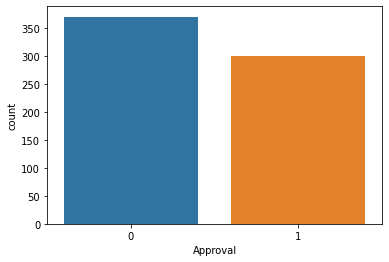

In [30]:
# 1 = Approved and 0 = Not Approved
sns.countplot(data = data, x = 'Approval')

# Train, Test, Split Before Modeling

In [31]:
# The first iterations of these models will include all columns except 'DriversLicense' and 'ZipCode'
# Later iterations of the models will have even fewer columns of data
# For the initial models, I will not be scaling the data until later iterations (if applicable)
data = data.drop(['DriversID', 'ZipCode'], axis = 1)

In [32]:
# 'james bond' male approved for credit card persona
# somewhat high debt is offset with good credit score, high income, over 5 years of work experience
# 149
data[(data['Gender'] == 1) & (data['Approval'] == 1) & (data['Age'] == 52)].head()

,Gender,Age,Debt,Married,BankClient,SchoolLevel,Ethnicity,YearsWorked,PriorDefault,Employed,CreditScore,Citizen,Income,Approval
149,1,52,15.0,1,0,1,7,5.5,1,1,14,0,2200,1


In [33]:
# 'maverick top gun' male denied for credit card persona
# despite 6.5 years of experience and low debt, low credit score and minimal income don't work out
# 300
data[(data['Gender'] == 1) & (data['Approval'] == 0) & (data['Age'] == 57)].head()

,Gender,Age,Debt,Married,BankClient,SchoolLevel,Ethnicity,YearsWorked,PriorDefault,Employed,CreditScore,Citizen,Income,Approval
300,1,57,2.000,1,0,5,2,6.5,0,1,1,0,10,0
527,1,57,0.335,1,0,6,0,1.0,1,0,0,0,2197,0


In [34]:
# 'hermoine granger' female approved for credit card persona
# modest income plus solid credit score and minimal debt work well despite minimal years of work
# 576
data[(data['Gender'] == 0) & (data['Approval'] == 1) & (data['Age'] == 30)].head()

,Gender,Age,Debt,Married,BankClient,SchoolLevel,Ethnicity,YearsWorked,PriorDefault,Employed,CreditScore,Citizen,Income,Approval
0,0,30,0.0,1,0,12,7,1.250,1,1,1,0,0,1
576,0,30,0.5,1,0,1,7,1.750,1,1,11,0,540,1
590,0,30,6.5,1,0,2,7,3.125,1,1,8,0,1200,1


In [35]:
# 'catwoman' female denied for credit card persona
# minimal work experience and credit score combined with a modest income and some debt don't work
# 645
data[(data['Gender'] == 0) & (data['Approval'] == 0) & (data['Age'] == 37)].head()

,Gender,Age,Debt,Married,BankClient,SchoolLevel,Ethnicity,YearsWorked,PriorDefault,Employed,CreditScore,Citizen,Income,Approval
85,0,37,4.000,1,0,1,0,5.000,1,0,0,2,0,0
100,0,37,1.750,2,2,1,0,0.250,1,0,0,0,400,0
116,0,37,7.000,1,0,10,3,11.500,1,1,7,0,5,0
427,0,37,0.835,1,0,4,7,0.040,0,0,0,0,5,0
645,0,37,2.665,1,0,2,7,0.165,0,0,0,0,501,0


In [36]:
X = data.drop(columns = 'Approval', axis = 1)
y = data['Approval']
X2 = X.copy()
y2 = y.copy()

In [37]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [38]:
# ss = StandardScaler()
# X_train_scale = ss.fit_transform(X_train)
# X_test_scale = ss.transform(X_test)

## Accuracy, confusion matrix, classification report function

In [39]:
# def print_metrics(y_test, y_pred):
#     print('Accuracy Score is:', accuracy_score(y_test, y_pred) * 100)
#     print()
#     print('Confusion matrix:')
#     print(confusion_matrix(y_test, y_pred))
#     print()
#     print('Classification report:')
#     print(classification_report(y_test, y_pred))

# First Logistic Regression 'Classifier' model

In [40]:
# log_reg = LogisticRegression(random_state = 42, solver = 'liblinear').fit(X_train, y_train)
# y_pred = log_reg.predict(X_test)

# print_metrics(y_test, y_pred)

# First Random Forest Classifier model

In [41]:
# rf = RandomForestClassifier(random_state = 42, n_estimators = 100).fit(X_train, y_train)
# y_pred = rf.predict(X_test)

# print_metrics(y_test, y_pred)

## First XGBoost model

In [42]:
# xgb = XGBClassifier(random_state = 42).fit(X_train, y_train)
# y_pred = xgb.predict(X_test)

# print_metrics(y_test, y_pred)

## First Ada Boost Classifier model

In [43]:
# ada = AdaBoostClassifier(random_state = 42).fit(X_train, y_train)
# y_pred = ada.predict(X_test)

# print_metrics(y_test, y_pred)

## First Gradient Boost model

In [44]:
# gbc = GradientBoostingClassifier(random_state = 42).fit(X_train, y_train)
# y_pred = gbc.predict(X_test)

# print_metrics(y_test, y_pred)

## Feature Importances with Chi-Squared

In [45]:
# # Apply SelectKBest class to extract all feature importances (k='all')
# top_features = SelectKBest(score_func = chi2, k = 'all')
# top_features.fit(X2, y2)
# scores = pd.DataFrame(top_features.scores_)
# columns = pd.DataFrame(X2.columns)

# # Concat two df for better visualization 
# top_scores = pd.concat([columns, scores], axis = 1)
# top_scores.columns = ['Feature Name', 'Score']
# print(top_scores.nlargest(13, 'Score'))

## Logistic Regression Feature Importance

In [46]:
# importance = log_reg.coef_[0]
# cols = data2.columns
# indices = np.argsort(importance)

# # Uncomment all lines below here to see outputs

# for i, v in enumerate(importance):
# 	print('Feature: %s, Score: %.5f' % (cols[i], v))
    
# plt.title('Logistic Regression Feature Importances')
# plt.barh(range(len(indices)), importance[indices], color = 'r', align = 'center')
# plt.yticks(range(len(indices)), [cols[i] for i in indices])
# plt.xlabel('Relative Importance')
# plt.show()

In [47]:
# importance = log_reg.coef_[0]
# cols = data.columns
# indices = np.argsort(importance)

# # Uncomment all lines below here to see outputs

# for i, v in enumerate(importance):
# 	print('Feature: %s, Score: %.5f' % (cols[i], v))
    
# plt.title('Logistic Regression Feature Importances')
# plt.barh(range(len(indices)), importance[indices], color = 'r', align = 'center')
# plt.yticks(range(len(indices)), [cols[i] for i in indices])
# plt.xlabel('Relative Importance')
# plt.show()

## Function to visualize 4 different models' feature importances

In [48]:
# def feature_imp_viz(model):
#     features = data2.columns
#     importances = model.feature_importances_
#     indices = np.argsort(importances)
    
#     model_name = 'model_name'
    
#     if model == rf:
#         model_name = 'Random Forest'
#     elif model == xgb:
#         model_name = 'XG Boost'
#     elif model == ada:
#         model_name = 'Ada Boost'
#     else:
#         model_name = 'Gradient Boost'
    
#     print('*' * 60)
    
#     for i, v in enumerate(importances):
#         print('Feature: %s, Score: %.5f' % (features[i], v))
    
#     plt.title(model_name + ' Feature Importances')
#     plt.barh(range(len(indices)), importances[indices], color = 'r', align = 'center')
#     plt.yticks(range(len(indices)), [features[i] for i in indices])
#     plt.xlabel('Relative Importance')
#     plt.show()

## Visualize 4 different models' feature importances

In [49]:
# Uncomment 3 lines below to see 4 visuals

# models = [rf, xgb, ada, gbc]
# for model in models:
#     feature_imp_viz(model)

## Round 2 of model testing (scaled data, default settings)

In [50]:
# classifiers = [LogisticRegression(random_state = 42, solver = 'liblinear'),
#                RandomForestClassifier(random_state = 42, n_estimators = 100),
#                XGBClassifier(random_state = 42),
#                AdaBoostClassifier(random_state = 42),
#                GradientBoostingClassifier(random_state = 42)]

# for clfs in classifiers:
#     clfs.fit(X_train_scale, y_train)
#     name = clfs.__class__.__name__
#     scale_predict = clfs.predict(X_test_scale)
#     print("=" * 60)
#     print(name)
#     print()
#     print('Accuracy Score (scaled):', accuracy_score(y_test, scale_predict) * 100)
#     print()
#     print('Confusion matrix (scaled):')
#     print(confusion_matrix(y_test, scale_predict))
#     print()
#     print('Classification report (scaled):')
#     print(classification_report(y_test, scale_predict))

## Round 3 of testing (GridSearch 2 models with 10 fold cross validation and non-scaled data)

## 10 Fold Cross Validation (ideal settings)

In [51]:
# classifier = [LogisticRegression(n_jobs = -1), RandomForestClassifier(n_jobs = -1)]

# log_reg_grid = {
#     'random_state' : [42],
#     'solver' : ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
#     'max_iter' : [50, 75, 100, 125, 150],
#     'multi_class' : ['auto']
# }

# rfc_grid = {
#     'n_estimators' : [50, 75, 100, 125, 150],
#     'criterion' : ['gini', 'entropy'],
#     'max_depth' : [None, 25, 50, 75, 100],
#     'min_samples_split' : [2, 4, 6, 8, 10],
#     'random_state' : [42]
# }

# param_grid_list = [log_reg_grid, rfc_grid]

# i = 0
# for clf in classifier:

#     gscv = GridSearchCV(estimator = clf, param_grid = param_grid_list[i], cv = 10)
#     gscv.fit(X_train, y_train)
#     i += 1

#     print('Model name:', clf.__class__.__name__)
# #     Uncomment 2 lines below to see optimal settings for each model
# #     print()
# #     print('Best params:', gscv.best_params_)
#     print()
#     y_pred = gscv.predict(X_test)
#     print('10 Fold Cross Validation Accuracy Score:', gscv.score(X_test, y_test) * 100)
#     print()
#     print('Confusion matrix:')
#     print(confusion_matrix(y_test, y_pred))
#     print()
#     print('Classification report:')
#     print(classification_report(y_test, y_pred))
#     print('=' * 120)

In [52]:
# rfc = RandomForestClassifier(n_estimators = 50, criterion = 'gini',
#                             max_depth = None, min_samples_split = 6,
#                             random_state = 42, n_jobs = -1)

In [53]:
# rfc.fit(X_train, y_train)

In [54]:
# Uncomment to save pickle file
# pickle.dump(rfc, open('rfc.pickle', 'wb'))

In [55]:
# Visualizing a decision tree
# fn = X.columns
# cn = y.name
# fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=800)
# tree.plot_tree(rfc.estimators_[0], feature_names = fn, 
#                class_names = cn, filled = True);
# Uncomment to save the image shown
# fig.savefig('RF_SingleTree.png')